# Aprovação de financiamento


O Dataset utilizado nesse notebook compõe o Loan prediction practice problem oferecido pela Analytics Vidhya todos os anos.

O Dataset será disponibilizado no github. Agora vamos ao que interessa!

Importando as bibliotecas necessárias para a limpeza e plotagem.

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Lendo o arquivo csv e dando a primeira olhada na situação.

In [7]:
train = pd.read_csv('train_loan.csv')
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Removendo o campo Loan_ID pois ele não será útil para nossa análise.

In [8]:
train = train.drop(columns=['Loan_ID'])
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Agova vamos transformar o campo 'Gender' em 1s e 0s.

In [9]:
train['Gender'] = train['Gender'].map({'Female': 0, 'Male': 1})
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


O mesmo tratamento será  realizado nos campos visivelmente binarios.

Nesse caso o campo 'Education':

In [10]:
train['Education'] = train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y


O campo 'Self_Employed':

In [11]:
train['Self_Employed'] = train['Self_Employed'].map({'No': 0, 'Yes': 1})
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


O campo 'Loan_Status':

In [12]:
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,Yes,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,Yes,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,Yes,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,No,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


O campo 'Married':

In [13]:
train['Married'] = train['Married'].map({'Yes': 1, 'No': 0})
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


Agora  que as tarefas mais simples de discretização foram realizadas, partimos para os casos que exigem um cuidado maior.

Começaremos pelo campo 'Dependents', precisamos primeiro descobrir quantos tipos distintos de registros existem, para isso vamos agrupar o dataset pelos valores do campo e conta-los:

In [14]:
print(train.groupby('Dependents').Dependents.value_counts())

Dependents  Dependents
0           0             345
1           1             102
2           2             101
3+          3+             51
Name: Dependents, dtype: int64


A saída do comando anterior é:

    Dependents  Dependents
    0.0         0.0           360
    1.0         1.0           102
    2.0         2.0           101
    3.0         3.0            51
    Name: Dependents, dtype: int64

Então iremos discretizar os dados da seguinte forma:
 - 0 = 0
 - 1 = 1
 - 2 = 2
 - 3+ = 3

In [15]:
print(train.Dependents.dtype)
dependentes = train['Dependents'].map({
    '0': 0,
    '1': 1,
    '2': 2,
    '3+': 3
})

train['Dependents'] = dependentes.astype(object)
train.head()

object


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


Agora faremos o mesmo procedimento com o campo 'Property_area':

In [16]:
print(train.groupby('Property_Area').Property_Area.value_counts())

Property_Area  Property_Area
Rural          Rural            179
Semiurban      Semiurban        233
Urban          Urban            202
Name: Property_Area, dtype: int64


The output of the line above was:

    Property_Area  Property_Area
    Rural          Rural            179
    Semiurban      Semiurban        233
    Urban          Urban            202
    Name: Property_Area, dtype: int64

So we will discretize this field by:
 - Rural = 0
 - Semiurban = 1
 - Urban = 2

In [17]:
train.Property_Area = train.Property_Area.map({
    'Rural': 0,
    'Semiurban': 1,
    'Urban': 2
})

train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


Após terminada a discretização de todos os campos, começaremos a preencher os valores NaN e null.

Iremos aplicar a moda nos valores discretos e a média ou mediana nos dados continuos:

'Gender':

In [18]:
#group_gender = train.groupby('Gender')
train['Gender'] = train['Gender'].fillna(int(train.Gender.mode()))
print(train.loc[train.Gender.isnull()].Gender)

Series([], Name: Gender, dtype: float64)


'Married':

In [19]:
print('Without fillna: ', train.loc[train.Married.isnull()].Married.count())

train.Married = train.Married.fillna(int(train.Married.mode()))

print('Applying fillna: ', train.loc[train.Married.isnull()].Married.count())

train.head()

Without fillna:  0
Applying fillna:  0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


'Property_Area':

In [20]:
print(train.Property_Area.isnull().sum())

0


'Dependents':

In [21]:
print(train.Dependents.isnull().sum())

15


In [22]:
train.Dependents = train.Dependents.fillna(float(train.Dependents.mode()))
print(train.Dependents)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
5      2.0
6      0.0
7      3.0
8      2.0
9      1.0
10     2.0
11     2.0
12     2.0
13     0.0
14     2.0
15     0.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     1.0
22     0.0
23     2.0
24     1.0
25     0.0
26     0.0
27     2.0
28     0.0
29     2.0
      ... 
584    1.0
585    1.0
586    0.0
587    0.0
588    0.0
589    2.0
590    0.0
591    2.0
592    3.0
593    0.0
594    0.0
595    0.0
596    2.0
597    0.0
598    0.0
599    2.0
600    3.0
601    0.0
602    3.0
603    0.0
604    1.0
605    0.0
606    1.0
607    2.0
608    0.0
609    0.0
610    3.0
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 614, dtype: float64


'Education':

In [23]:
print(train.Education.isnull().sum())

0


'Self-employed':

In [26]:
print(train.Self_Employed.isnull().sum())

0


In [25]:
train.Self_Employed = train.Self_Employed.fillna(float(train.Self_Employed.mode()))

Agora vamos para o campo 'ApplicantIncome'. Para entender a melhor forma de preencher os possíveis campos NaN ou Null iremos:
 - Verificar a existencia de NaN ou Nulls.
 - Checar os valores de média, mediana e moda.
 - Aplicar o valor que melhor se encaixar no campo.

In [27]:
print('Number of NaN occurrences: ', train.ApplicantIncome.isnull().sum())
print('Mean: ', train.ApplicantIncome.mean())
print('Median: ', train.ApplicantIncome.median())
print('Mode: ', train.ApplicantIncome.mode())
print('Max value: ', train.ApplicantIncome.max())
print('Min value: ', train.ApplicantIncome.min())

Number of NaN occurrences:  0
Mean:  5403.459283387622
Median:  3812.5
Mode:  0    2500
dtype: int64
Max value:  81000
Min value:  150


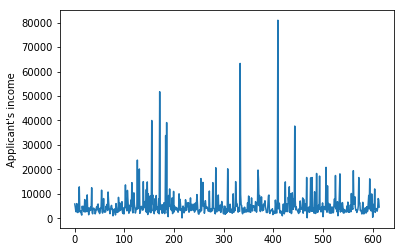

In [28]:
plt.plot(train.ApplicantIncome)
plt.ylabel('Applicant\'s income')
plt.show()

Agora aplicaremos o mesmo procedimento para o campo 'CoapplicantIncome':

In [29]:
print('Number of NaN occurrences: ', train.CoapplicantIncome.isnull().sum())
print('Mean: ', train.CoapplicantIncome.mean())
print('Median: ', train.CoapplicantIncome.median())
print('Mode: ', train.CoapplicantIncome.mode())
print('Max. value: ', train.CoapplicantIncome.max())
print('Min. value: ', train.CoapplicantIncome.min())

Number of NaN occurrences:  0
Mean:  1621.2457980271008
Median:  1188.5
Mode:  0    0.0
dtype: float64
Max. value:  41667.0
Min. value:  0.0


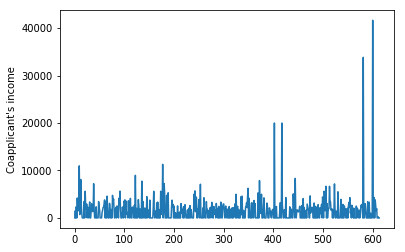

In [30]:
plt.plot(train.CoapplicantIncome)
plt.ylabel('Coapplicant\'s income')
plt.show()

'LoanAmount':

In [31]:
print('Number of NaN occurrences: ', train.LoanAmount.isnull().sum())
print('Mean: ', train.LoanAmount.mean())
print('Median: ', train.LoanAmount.median())
print('Mode: ', train.LoanAmount.mode())
print('Max value: ', train.LoanAmount.max())
print('Min value: ', train.LoanAmount.min())

Number of NaN occurrences:  22
Mean:  146.41216216216216
Median:  128.0
Mode:  0    120.0
dtype: float64
Max value:  700.0
Min value:  9.0


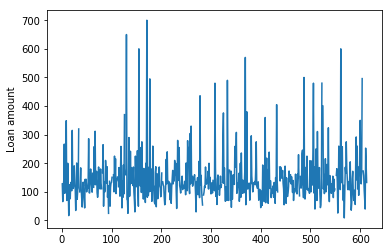

In [32]:
plt.plot(train.LoanAmount)
plt.ylabel('Loan amount')
plt.show()

In [33]:
train.LoanAmount = train.LoanAmount.fillna(float(train.LoanAmount.mode()))
print('Number of NaN occurrences: ', train.LoanAmount.isnull().sum())
print(train.LoanAmount)

Number of NaN occurrences:  0
0      120.0
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605    120.0
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64


In [34]:
print(train.Loan_Amount_Term.isnull().sum())

14


In [35]:
print('Number of NaN occurrences: ', train.Loan_Amount_Term.isnull().sum())
print('Mean: ', train.Loan_Amount_Term.mean())
print('Median: ', train.Loan_Amount_Term.median())
print('Mode: ', train.Loan_Amount_Term.mode())
print('Max value: ', train.Loan_Amount_Term.max())
print('Min value: ', train.Loan_Amount_Term.min())

Number of NaN occurrences:  14
Mean:  342.0
Median:  360.0
Mode:  0    360.0
dtype: float64
Max value:  480.0
Min value:  12.0


In [36]:
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(float(train.Loan_Amount_Term.mode()))
print(train.Loan_Amount_Term.isnull().sum())

0


In [37]:
print(train.Credit_History.isnull().sum())

50


In [38]:
print('Number of NaN occurrences: ', train.Credit_History.isnull().sum())
print('Mean: ', train.Credit_History.mean())
print('Median: ', train.Credit_History.median())
print('Mode: ', train.Credit_History.mode())
print('Max value: ', train.Credit_History.max())
print('Min value: ', train.Credit_History.min())

Number of NaN occurrences:  50
Mean:  0.8421985815602837
Median:  1.0
Mode:  0    1.0
dtype: float64
Max value:  1.0
Min value:  0.0


In [39]:
train.Credit_History = train.Credit_History.fillna(float(train.Credit_History.mode()))
print(train.Credit_History.isnull().sum())

0


In [40]:
print(train.Property_Area.isnull().sum())

0


In [41]:
print(train.Loan_Status.isnull().sum())

0


In [42]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,120.0,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


Vamos agora remover os outliers. Como visto em alguns dos gráficos anteriores, alguns valores definitivamente não pertencem ao padrão dos dados.

O boxplot é uma das melhores formas de identificar outliers, ele usa os valores de media, mediana para definir o agrupamento de registros mais comuns e suas respectivas margens, sendo assim, quem ficar fora dos limites do gráfico foge do que a maioria dos dados dita.

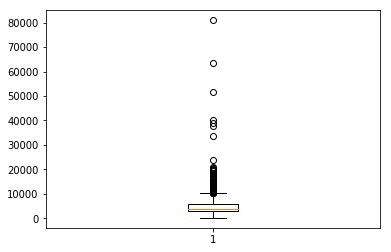

In [43]:
plt.boxplot(train.ApplicantIncome)
plt.show()

In [44]:
train_3std = train[np.abs(train.ApplicantIncome -  train.ApplicantIncome.mean()) <= (3 * train.ApplicantIncome.std())]

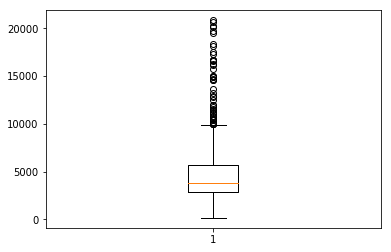

In [45]:
plt.boxplot(train_3std.ApplicantIncome)
plt.show()

In [46]:
train_2std = train[np.abs(train.ApplicantIncome -  train.ApplicantIncome.mean()) <= (2 * train.ApplicantIncome.std())]
train_2std.count()

Gender               598
Married              598
Dependents           598
Education            598
Self_Employed        598
ApplicantIncome      598
CoapplicantIncome    598
LoanAmount           598
Loan_Amount_Term     598
Credit_History       598
Property_Area        598
Loan_Status          598
dtype: int64

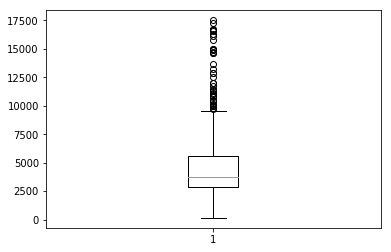

In [47]:
plt.boxplot(train_2std.ApplicantIncome)
plt.show()

In [48]:
train_1std = train[np.abs(train.ApplicantIncome -  train.ApplicantIncome.mean()) <= (train.ApplicantIncome.std())]
train_1std.count()

Gender               574
Married              574
Dependents           574
Education            574
Self_Employed        574
ApplicantIncome      574
CoapplicantIncome    574
LoanAmount           574
Loan_Amount_Term     574
Credit_History       574
Property_Area        574
Loan_Status          574
dtype: int64

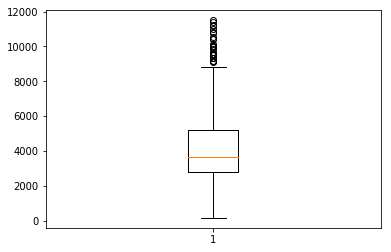

In [49]:
plt.boxplot(train_1std.ApplicantIncome)
plt.show()

In [50]:
print('Min: ', train_1std.ApplicantIncome.min())
print('Max: ', train_1std.ApplicantIncome.max())

Min:  150
Max:  11500


In [51]:
train_07std = train[np.abs(train.ApplicantIncome -  train.ApplicantIncome.mean()) <= (0.7 * train.ApplicantIncome.std())]
train_07std.count()

Gender               548
Married              548
Dependents           548
Education            548
Self_Employed        548
ApplicantIncome      548
CoapplicantIncome    548
LoanAmount           548
Loan_Amount_Term     548
Credit_History       548
Property_Area        548
Loan_Status          548
dtype: int64

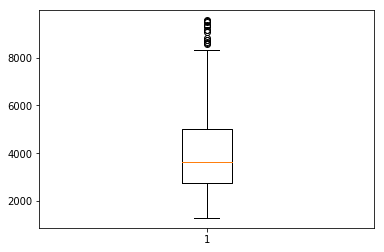

In [52]:
plt.boxplot(train_07std.ApplicantIncome)
plt.show()

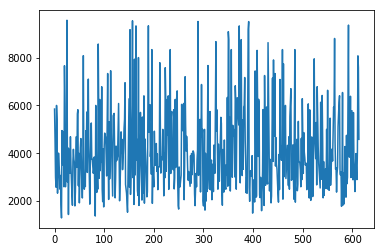

In [53]:
plt.plot(train_07std.ApplicantIncome)
plt.show()

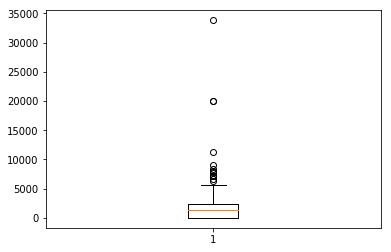

In [54]:
plt.boxplot(train_07std.CoapplicantIncome)
plt.show()

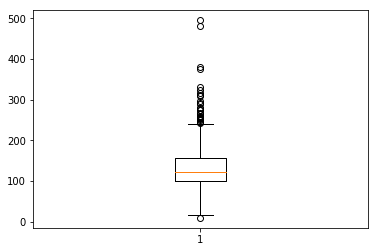

In [55]:
plt.boxplot(train_07std.LoanAmount)
plt.show()

In [56]:
train_1std.ApplicantIncome = train_1std.ApplicantIncome / train_1std.ApplicantIncome.mean()
train_1std.head()

c:\users\yago.souza\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,1.378452,0.0,120.0,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,1.080090,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,0.707019,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,0.608744,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,1.414039,0.0,141.0,360.0,1.0,2,1


In [57]:
train_1std.CoapplicantIncome = train_1std.CoapplicantIncome / train_1std.CoapplicantIncome.mean()
train_1std.head()

c:\users\yago.souza\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,1.378452,0.000000,120.0,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,1.080090,0.902194,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,0.707019,0.000000,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,0.608744,1.410725,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,1.414039,0.000000,141.0,360.0,1.0,2,1


In [60]:
train_1std.to_csv('train_1std_scaled.csv', index=False)